### - Sobhan Moradian Daghigh
#### - 4/13/2022
#### - DIP - HW01 - Q3

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

### Part A.

In [2]:
mylius_erichsen_land_2000 = cv2.imread('./inputs/P3/mylius_erichsen_land_2000.jpg', 0)
mylius_erichsen_land_2020 = cv2.imread('./inputs/P3/mylius_erichsen_land_2020.jpg', 0)

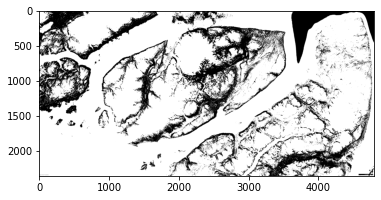

In [3]:
_, mylius_erichsen_land_2000 = cv2.threshold(mylius_erichsen_land_2000, 0, 1, cv2.THRESH_OTSU)
plt.imshow(mylius_erichsen_land_2000, cmap='gray')

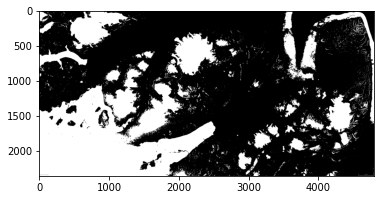

In [4]:
_, mylius_erichsen_land_2020 = cv2.threshold(mylius_erichsen_land_2020, 0, 1, cv2.THRESH_OTSU)
plt.imshow(mylius_erichsen_land_2020, cmap='gray')

In [33]:
snows, melted = 0, 0
for i in range(mylius_erichsen_land_2000.shape[0]):
    for j in range(mylius_erichsen_land_2000.shape[1]):
        if mylius_erichsen_land_2000[i, j] == 1:
            snows += 1
            if mylius_erichsen_land_2020[i, j] == 0:
                melted += 1
                
print('Melted Percentage: {} %'.format(round(np.multiply(100, np.divide(melted, snows)), 2)))

Melted Percentage: 60.27 %


### Part B.

In [6]:
def calculate_area(num, scale, pixels):
    temp = np.sqrt(num)    
    temp2 = np.divide(temp, pixels)
    return np.power(np.multiply(temp2, scale), 2)

In [12]:
lake_urmia_2000 = cv2.imread('./inputs/P3/lake_urmia_2000.jpg')
lake_urmia_2000 = cv2.cvtColor(lake_urmia_2000, cv2.COLOR_BGR2RGB)

lake_urmia_2018 = cv2.imread('./inputs/P3/lake_urmia_2018.jpg')
lake_urmia_2018 = cv2.cvtColor(lake_urmia_2018, cv2.COLOR_BGR2RGB)

lake_urmia_2020 = cv2.imread('./inputs/P3/lake_urmia_2020.jpg')
lake_urmia_2020 = cv2.cvtColor(lake_urmia_2020, cv2.COLOR_BGR2RGB)

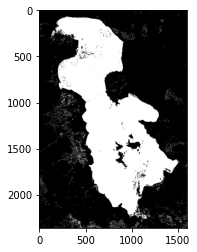

In [13]:
lake_urmia_2000 = lake_urmia_2000[:, 450: -550]
lake_urmia_2000 = cv2.inRange(lake_urmia_2000, (0, 60, 90), (100, 255, 255))
_, lake_urmia_2000 = cv2.threshold(lake_urmia_2000, 0, 1, cv2.THRESH_OTSU)
plt.imshow(lake_urmia_2000, cmap='gray')

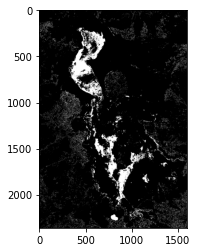

In [14]:
lake_urmia_2018 = lake_urmia_2018[:, 450: -550]
lake_urmia_2018 = cv2.inRange(lake_urmia_2018, (50, 108, 50), (120, 255, 255))
_, lake_urmia_2018 = cv2.threshold(lake_urmia_2018, 0, 1, cv2.THRESH_OTSU)
plt.imshow(lake_urmia_2018, cmap='gray')

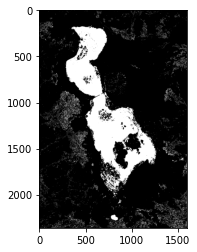

In [15]:
lake_urmia_2020 = lake_urmia_2020[:, 450: -550]
lake_urmia_2020 = cv2.inRange(lake_urmia_2020, (50, 100, 50), (110, 255, 255))
_, lake_urmia_2020 = cv2.threshold(lake_urmia_2020, 0, 1, cv2.THRESH_OTSU)
plt.imshow(lake_urmia_2020, cmap='gray')

In [16]:
water_2000, water_2018, water_2020 = 0, 0, 0
for i in range(lake_urmia_2000.shape[0]):
    for j in range(lake_urmia_2000.shape[1]):
        if lake_urmia_2000[i, j] == 1:
            water_2000 += 1
        if lake_urmia_2018[i, j] == 1:
            water_2018 += 1
        if lake_urmia_2020[i, j] == 1:
            water_2020 += 1

In [24]:
scale = 20   # km
pixels = 314 # pixels for 10 km

In [25]:
area_2000 = calculate_area(water_2000, scale, pixels)
volume_2000 = np.multiply(area_2000, 0.0028)

In [26]:
area_2018 = calculate_area(water_2018, scale, pixels)
volume_2018 = np.multiply(area_2018, 0.0006)

In [31]:
print('Volume of water evaporated between 2000 and 2018: \n{} km3'.format(round(np.subtract(volume_2000, volume_2018), 2)))

Volume of water evaporated between 2000 and 2018: 
13.7 km3


### Part C.

In [28]:
area_2020 = calculate_area(water_2020, scale, pixels)
volume_2020 = np.multiply(area_2020, 0.0009)

In [32]:
print('Percentage of the lake which was restored: \n{} %'.format(round(np.multiply(np.divide(np.subtract(volume_2020, volume_2018), volume_2000), 100), 2)))

Percentage of the lake which was restored: 
11.22 %


### Part D.

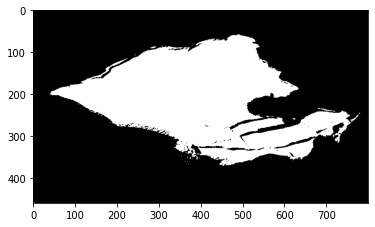

In [45]:
furtwangler_glacier_2003 = cv2.imread('./inputs/P3/furtwangler_glacier_2003.jpg', 0)
furtwangler_glacier_2003 = furtwangler_glacier_2003[1800:-100, 100:900]
_, furtwangler_glacier_2003 = cv2.threshold(furtwangler_glacier_2003, 0, 1, cv2.THRESH_OTSU)
plt.imshow(furtwangler_glacier_2003, cmap='gray')

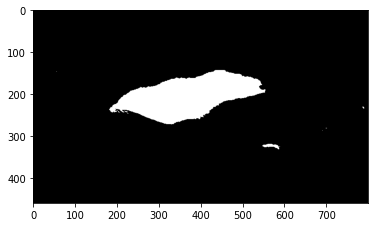

In [46]:
furtwangler_glacier_2017 = cv2.imread('./inputs/P3/furtwangler_glacier_2017.jpg', 0)
furtwangler_glacier_2017 = furtwangler_glacier_2017[1800:-100, 100:900]
_, furtwangler_glacier_2017 = cv2.threshold(furtwangler_glacier_2017, 0, 1, cv2.THRESH_OTSU)
plt.imshow(furtwangler_glacier_2017, cmap='gray')

In [47]:
glacier, melted = 0, 0
for i in range(furtwangler_glacier_2003.shape[0]):
    for j in range(furtwangler_glacier_2003.shape[1]):
        if furtwangler_glacier_2003[i, j] == 1:
            glacier += 1
            if furtwangler_glacier_2017[i, j] == 0:
                melted += 1
                
print('Melted Percentage: {} %'.format(round(np.multiply(100, np.divide(melted, glacier)), 2)))

Melted Percentage: 75.59 %


### Part C.

In [48]:
def load_datas():
    images = glob.glob('../DIP_HW1/inputs/P3/siling_lake*')
    
    names = []
    imgs = []
    for image in images:
        name = image.split('\\')[-1][:-4]
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        names.append(name)
        imgs.append(img)               
            
    return names, imgs

In [141]:
names, imgs = load_datas()

In [142]:
scale = 10   # km
pixels = 252 # pixels for 10 km

In [155]:
volumes = []
for i, (siling_lake, year) in enumerate(zip(imgs ,names)):
    siling_lake = cv2.inRange(siling_lake, (0, 0, 0), (80, 255, 255))
    siling_lake = cv2.GaussianBlur(siling_lake, (99, 99), 0)
    _, siling_lake = cv2.threshold(siling_lake, 0, 1, cv2.THRESH_OTSU)
    
    water = 0
    for i in range(siling_lake.shape[0]):
        for j in range(siling_lake.shape[1]):
            if siling_lake[i, j] == 1:
                water += 1
    
    area = calculate_area(water, scale, pixels)
    volume = np.multiply(area, np.add(0.0064, np.multiply(0.0003, i)))
    volumes.append(volume)

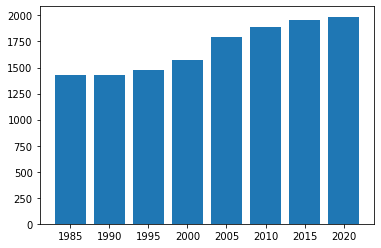

In [157]:
plt.bar([name[-4:] for name in names], volumes)
plt.show()

### Finito